This code implements a random forest algorithm for ingredient prediction based on a dataset of recipes. It uses bootstrapped sampling, feature selection, and an ensemble of decision trees to make predictions.

 Bootstrapping helps in generating diverse training subsets, enabling the model to capture a wide range of ingredient patterns across different recipes and user preferences. This enhances the model's ability to generalize well to new recipes and user inputs, ultimately improving the accuracy of ingredient predictions.

 Accuracy: 0.10526315789473684

Accuracy: 0.10526315789473684


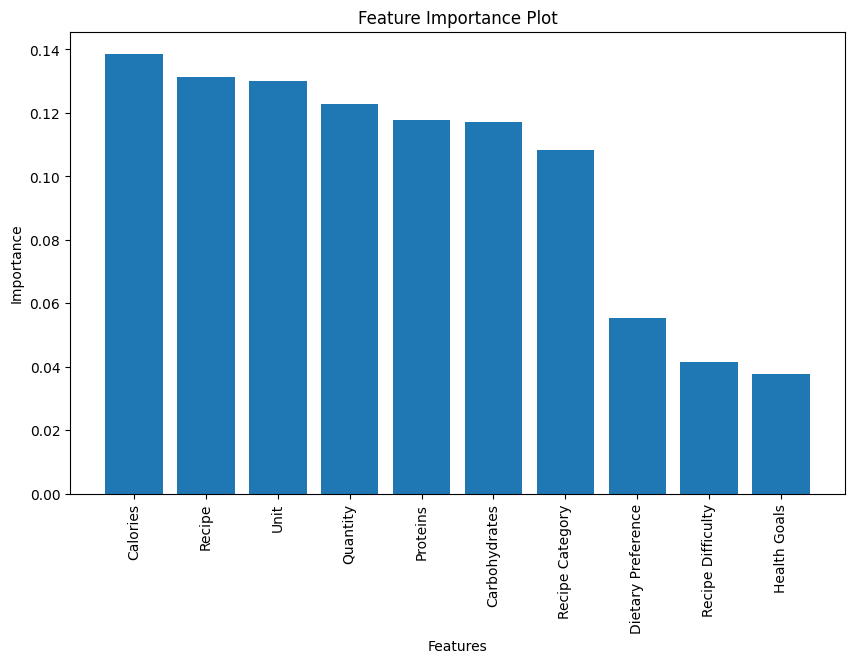

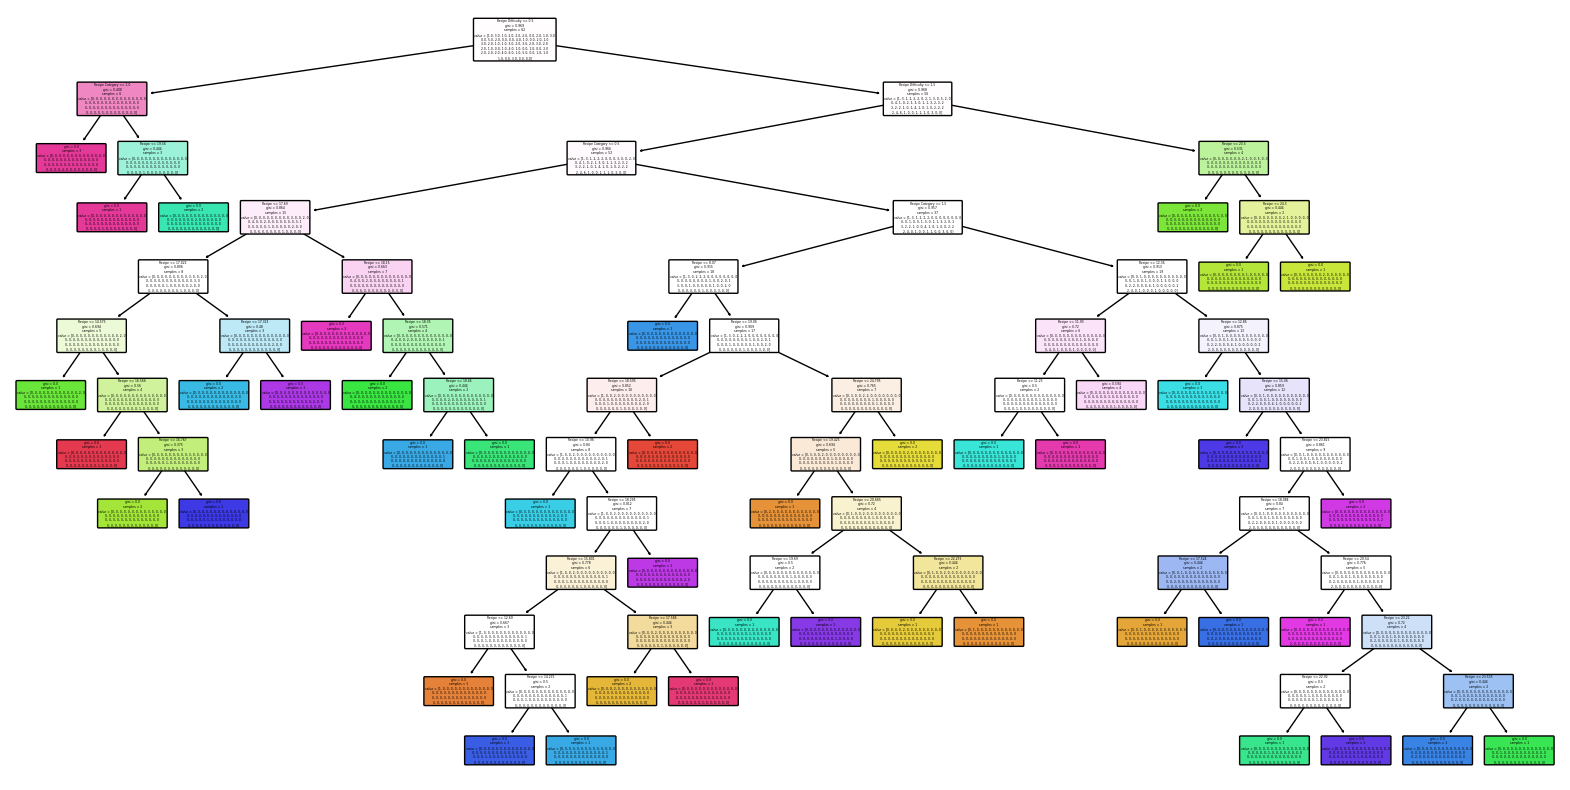

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.calibration import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("updated_cleaned_recipe_dataset.csv")

# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Bootstrapped Sampling, Feature Selection, and Ensemble of Trees
n_samples = data.shape[0]
bootstrap_size = n_samples
n_trees = 100  # Number of decision trees in the forest
forest = []

for _ in range(n_trees):
    # Randomly select samples with replacement (bootstrapping)
    bootstrap_indices = np.random.choice(range(n_samples), size=bootstrap_size, replace=True)
    bootstrap_sample = data.iloc[bootstrap_indices]

    # Features: All columns except for Ingredients
    X = bootstrap_sample.drop(columns=["Ingredient"])
    y = bootstrap_sample["Ingredient"]

    # Feature Selection: Randomly select a subset of features
    n_features = int(np.sqrt(X.shape[1]))  # Select square root of the total number of features
    selected_features = np.random.choice(X.columns, size=n_features, replace=False)
    X = X[selected_features]

    # Decision Tree Construction
    tree = RandomForestClassifier(n_estimators=1)  # Grow a single decision tree
    tree.fit(X, y)
    forest.append(tree)

# Combine the ensemble of decision trees
rf_model = RandomForestClassifier(n_estimators=n_trees)
rf_model.estimators_ = forest

# Split data into features (X) and target variable (y)
X = data.drop(columns=["Ingredient"])  # Features 
y = data["Ingredient"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the random forest model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize feature importance for the entire forest
feature_importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.xticks(rotation=90)
plt.show()

# Visualize the first decision tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(forest[0].estimators_[0], feature_names=feature_names, filled=True, rounded=True)
plt.show()


This code implements a Random Forest algorithm with cross-validation for improved model evaluation, aiming to address overfitting and enhance generalization compared to using only feature selection and bootstrapping.

Accuracy: 0.10526315789473684


C:\Users\fatin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Cross-Validation Mean Accuracy: 0.2021276595744681


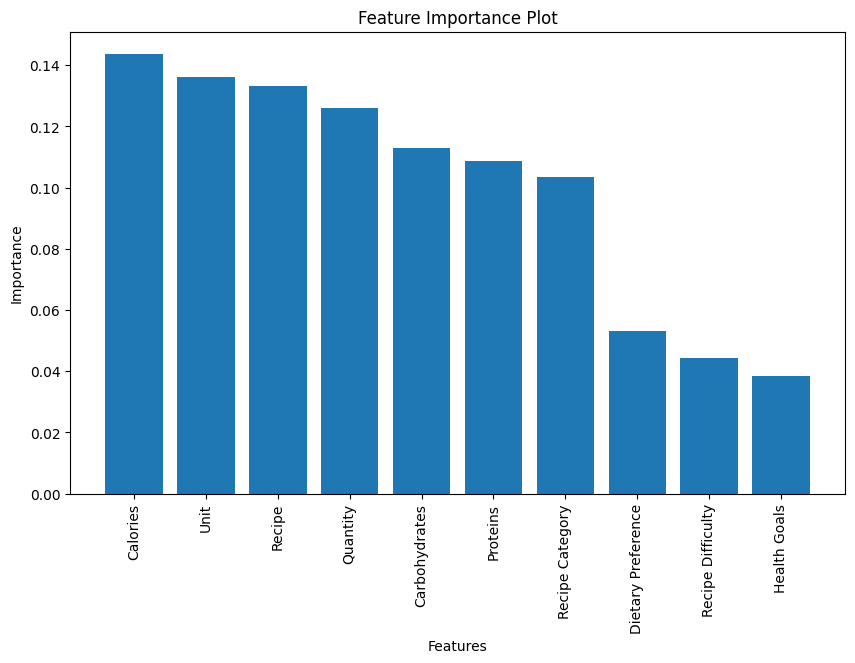

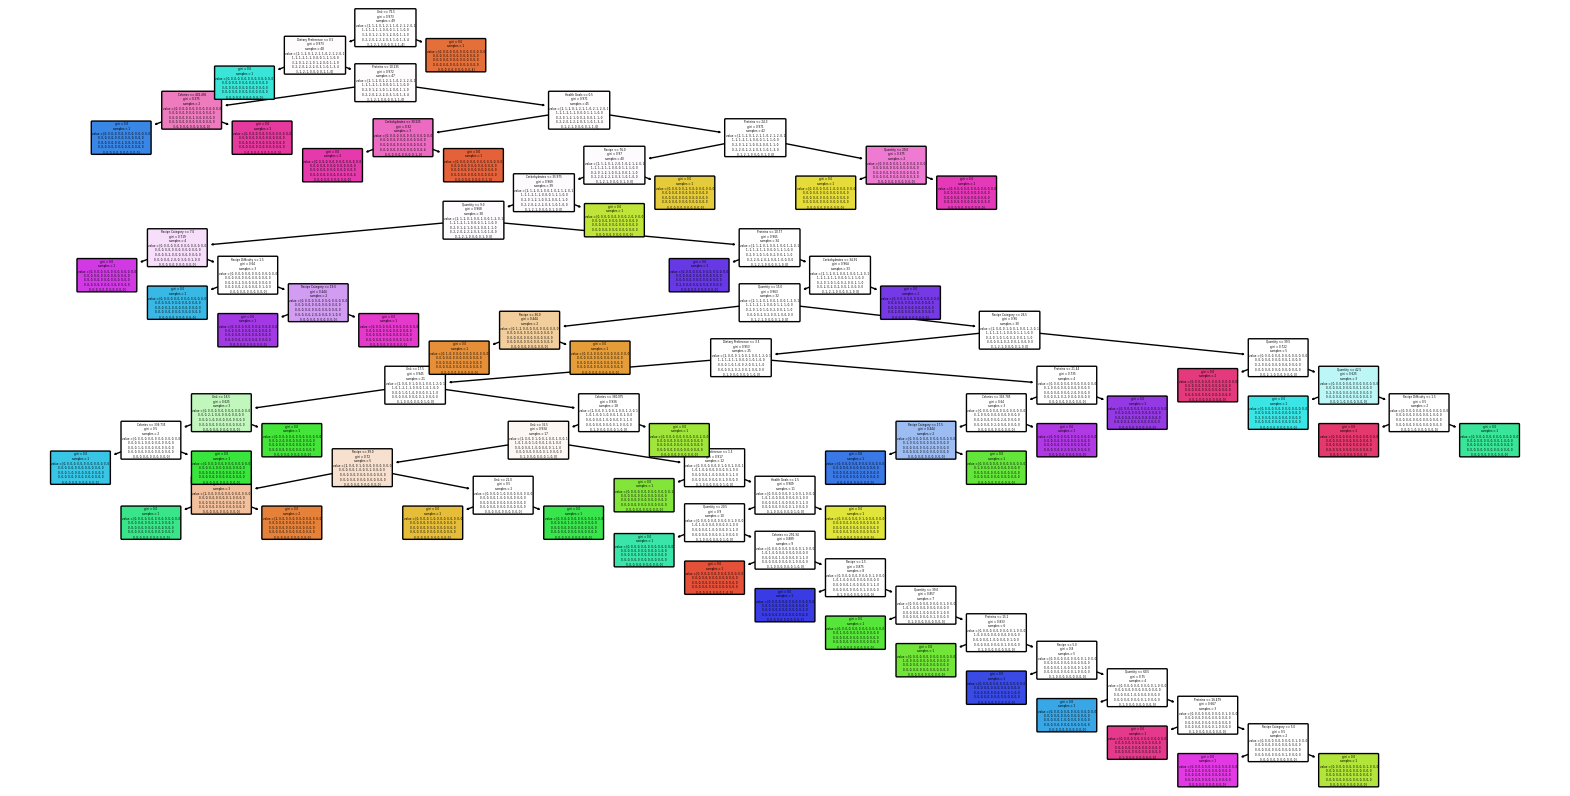

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

# Load the dataset
data = pd.read_csv("updated_cleaned_recipe_dataset.csv")

# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split data into features (X) and target variable (y)
X = data.drop(columns=["Ingredient"])  # Features 
y = data["Ingredient"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the random forest model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=2)
print("Cross-Validation Mean Accuracy:", np.mean(cv_scores))

# Visualize feature importance for the entire forest
feature_importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.xticks(rotation=90)
plt.show()

# Visualize the first decision tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=feature_names, filled=True, rounded=True)
plt.show()
